# Cellphone churn dataset

---

This dataset, located in the `cell_phone_churn` folder, is a dataset containing information on the cell phone "churn rates" for people in different states

The columns are described:
    
    state: state
    account_length: days in account
    area_code: phone area code
    intl_plan: international plan vs. not
    vmail_plan: voicemail plan vs. not
    vmail_message: how many voicemail messages
    day_mins: number of day mins
    day_calls: number of day calls
    day_charge: day call charge
    eve_mins: number of evening call mins
    eve_calls: number of evening calls
    eve_charge: evening call charge
    night_mins: number of night minutes
    night_calls: number of night calls
    night_charge: charge for night calls
    intl_mins: number of international calls
    intl_calls: international call minutes
    intl_charge: charge for international calls
    custserv_calls: how many customer service calls
    churn: churned vs not
    
The implied variable of interest here is the churn. You will want to subset by churn and look at different variables, probably plotting in different colors variables on the same plot. 
---

### Requirements

As a group you should:

1. Load and clean, if neccessary, the data with pandas.
2. Identify variables and subsets of the data your are interested in as a group.
2. Describe the data and investigate any outliers for those variables.
3. Explore relationships between variables.
4. Visualize at least three variables of your choice with appropriate visualizations. They should be readable.
5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. For example, number of customer service calls by churn rate.
6. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [1]:
#Import all needed libraries for lab

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#Load the cell phone data set
file_path = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/cell_phone_churn/cell_phone_churn.csv'
df = pd.read_csv(file_path)

We ran info and describe together to check and see the completeness of the data set. Frominfo we see there are 3,333 rows and each column has 3,333 non-null values. This tells us there are no gaps in the data. If we look at the datatype from info and compare to df head all of the datatypes look appropriate.

In [79]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
state                3333 non-null object
account_length       3333 non-null int64
area_code            3333 non-null int64
intl_plan            3333 non-null object
vmail_plan           3333 non-null object
vmail_message        3333 non-null int64
day_mins             3333 non-null float64
day_calls            3333 non-null int64
day_charge           3333 non-null float64
eve_mins             3333 non-null float64
eve_calls            3333 non-null int64
eve_charge           3333 non-null float64
night_mins           3333 non-null float64
night_calls          3333 non-null int64
night_charge         3333 non-null float64
intl_mins            3333 non-null float64
intl_calls           3333 non-null int64
intl_charge          3333 non-null float64
custserv_calls       3333 non-null int64
churn                3333 non-null bool
n_day_min            3333 non-null float64
n_eve_min   

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,n_day_min,n_eve_min,n_intl_min,n_cust_serv_calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,1.566532,-0.070599,-0.084995,-0.427868
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,-0.333688,-0.108064,1.240296,-0.427868
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,1.168128,-1.573147,0.703015,-1.188040
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,2.196267,-2.742453,-1.302831,0.332305
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,-0.240054,-1.038776,-0.049177,1.092477


 couple of observations we made looking at the correlation matrix:
  1) Minutes and charges are perfectly corellated. This tells us there is a flat rate per min and no tiered pricing
  2) The two variables most highly correlated with churn are day_min, and cust_service_calls. These both have a 
     positive correlation of ~.2 These may be useful in predicitng the liklelyhood of a customer leaving.

In [98]:
df.corr()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,...,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,n_day_min,n_eve_min,n_intl_min,n_cust_serv_calls
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,...,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.006216,-0.006757,0.009514,-0.003796
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,...,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.008264,0.003580,-0.018288,0.027572
vmail_message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,...,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.000778,0.017562,0.002856,-0.013263
day_mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,...,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,1.000000,0.007043,-0.010155,-0.013423
day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,...,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.006750,-0.021451,0.021565,-0.018942
day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,...,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,1.000000,0.007050,-0.010157,-0.013427
eve_mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,...,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.007043,1.000000,-0.011035,-0.012985
eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,...,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.015769,-0.011430,0.008703,0.002423
eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,...,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,0.007029,1.000000,-0.011043,-0.012987
night_mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,...,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,0.004323,-0.012584,-0.015207,-0.009288


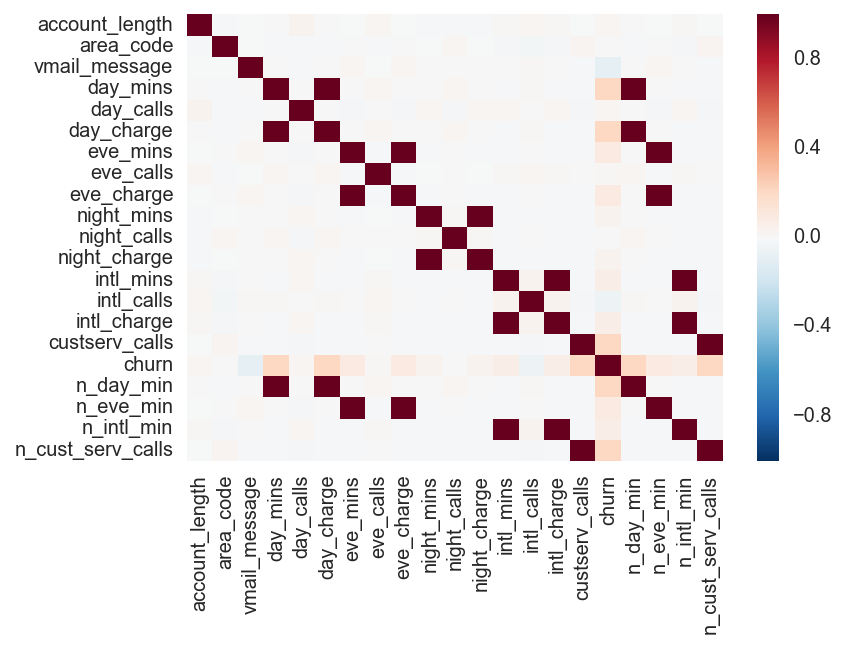

In [97]:
sns.heatmap(df.corr())

From the correlation matrix we decided to take a look at 4 variables: day_mins, eve_mins, intl_mins, and custserv_calls. The first step was to construct a pair plot to look at the histogram as well as to see if there is a strong relationship between these variables.

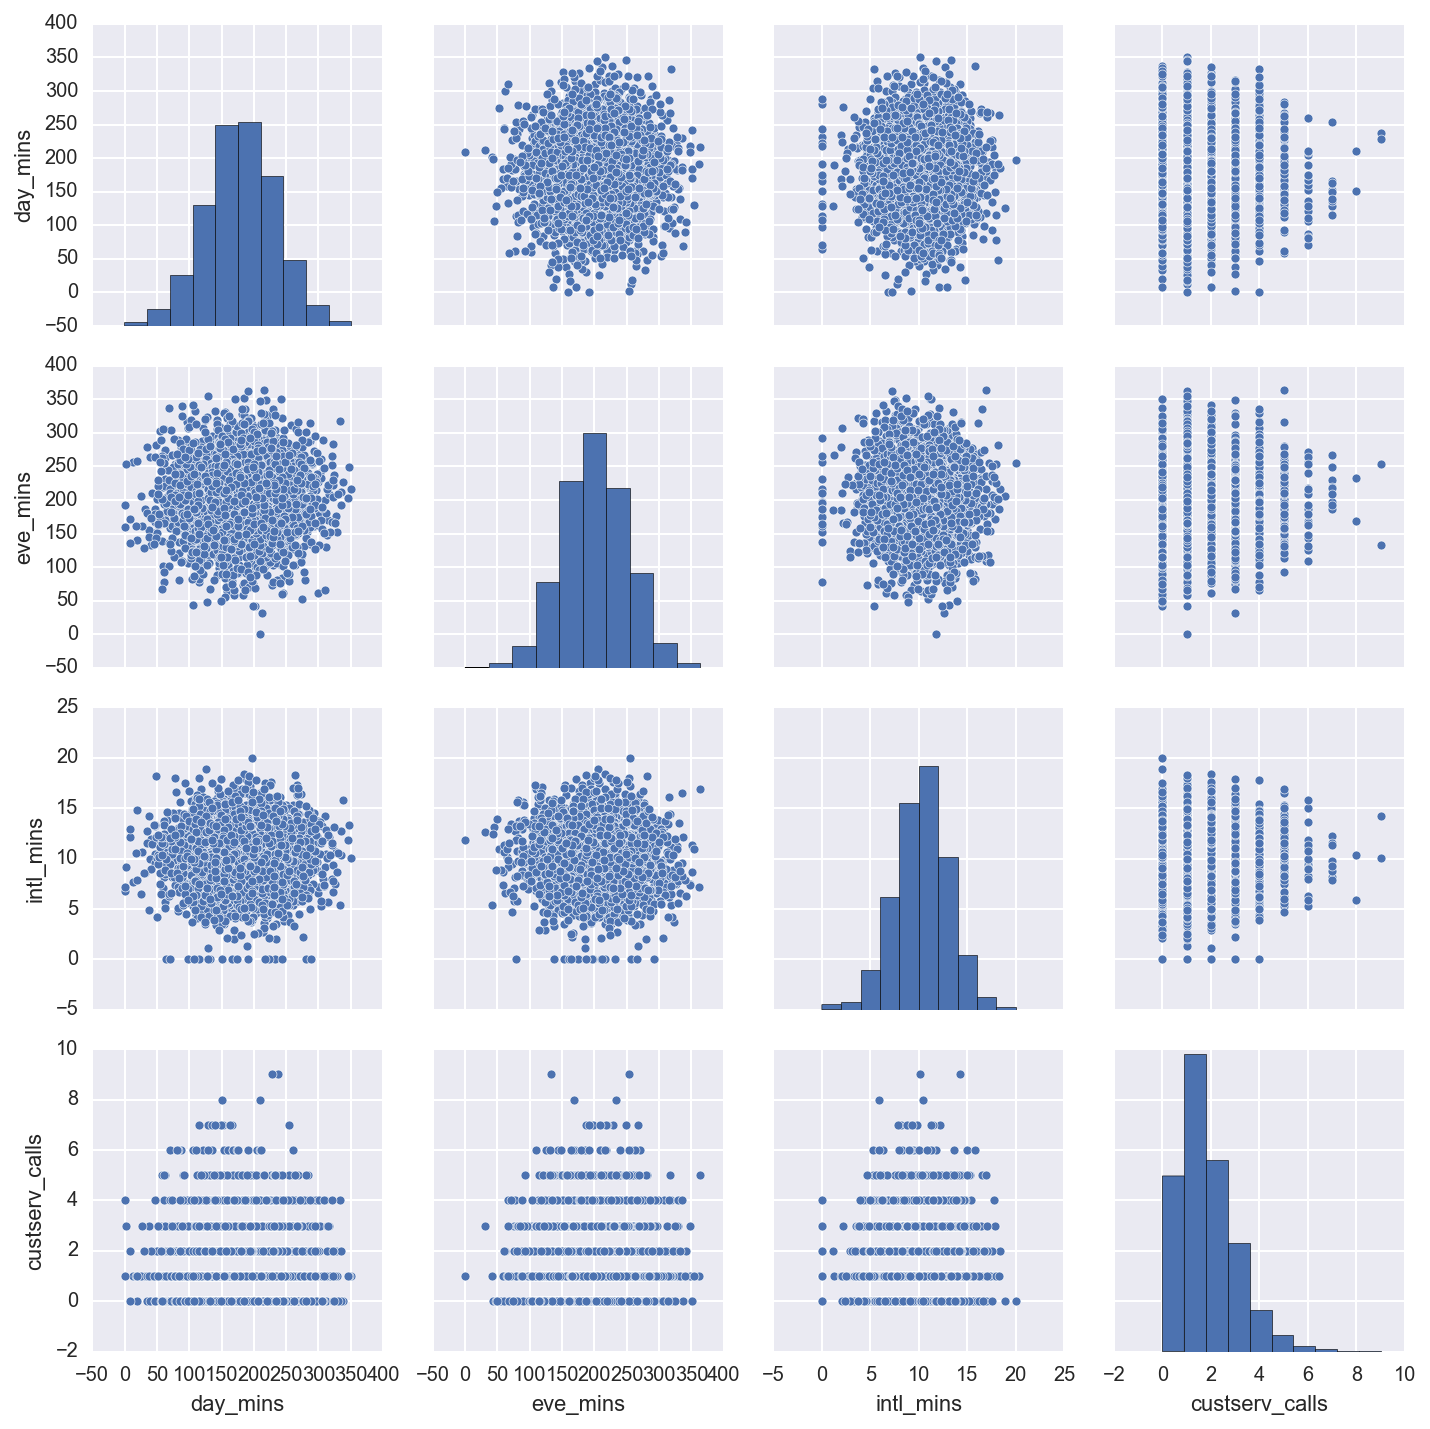

In [85]:
sns.pairplot(df[['day_mins', 'eve_mins', 'intl_mins', 'custserv_calls']])

To visualize the distribution of each of the variables we also created a boxplot for each one. As you can see
from the boxplot below the custserv_calls is on a different scale so it is not particularly helpful to present
it as is.

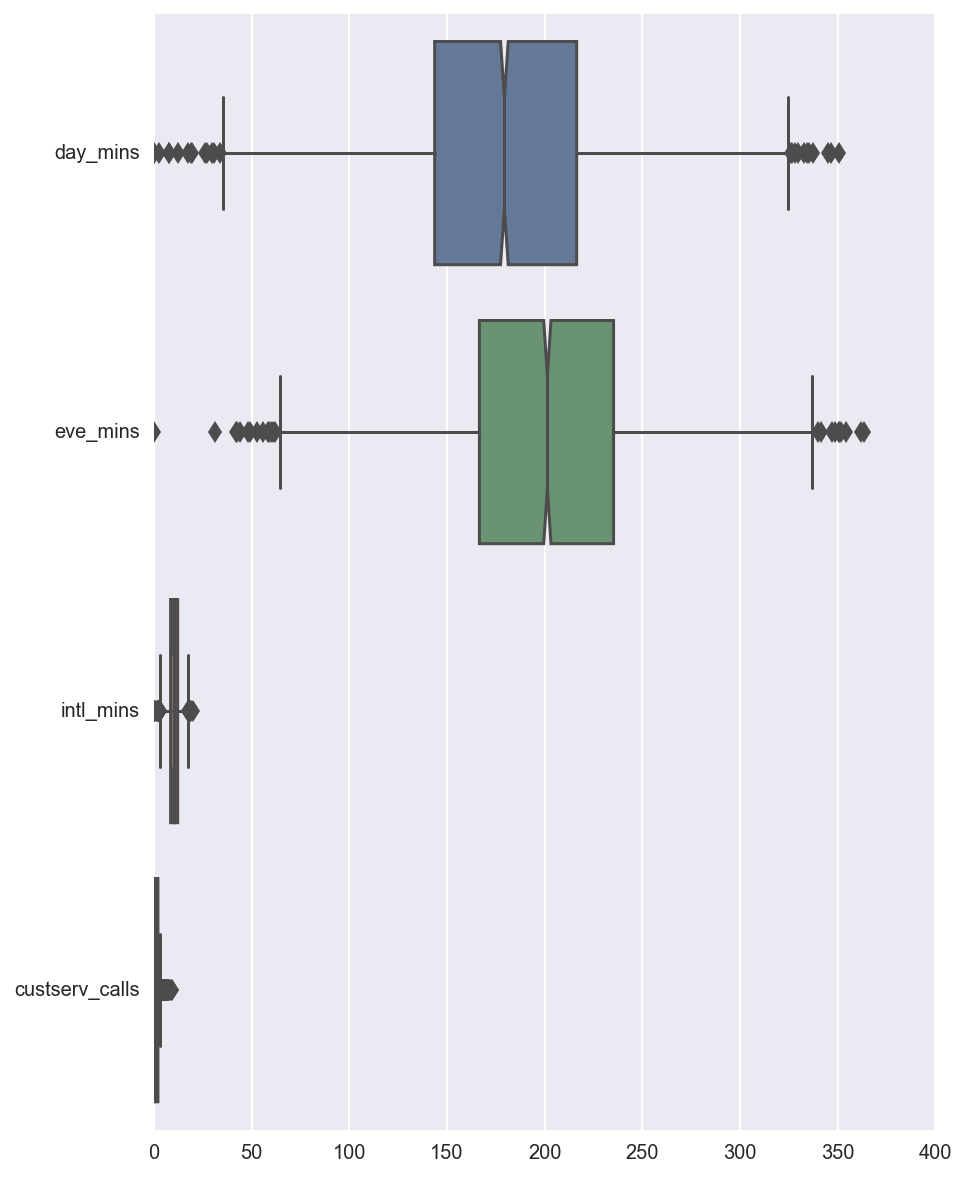

In [89]:
fig = plt.figure(figsize=(7,10))
ax = fig.gca()
sns.boxplot(data=df[['day_mins', 'eve_mins', 'intl_mins', 'custserv_calls']], 
            orient='h',fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

To fix the issue with the scale we normalized each of the variables (mean = 0, and std =1). We added each of these normalized figures as new columns in our data frame. 

In [71]:
#Also adds normalized columns for the minutes column and the cust service call
df['n_day_min'] = (df.day_mins - df.day_mins.mean())/df.day_mins.std()
df['n_eve_min'] = (df.eve_mins - df.eve_mins.mean())/df.eve_mins.std()
df['n_intl_min'] =  (df.intl_mins - df.intl_mins.mean())/df.intl_mins.std()
df['n_cust_serv_calls'] = (df.custserv_calls - df.custserv_calls.mean())/df.custserv_calls.std()


In [ ]:
Now we replot the box-plot using the normalized variables.

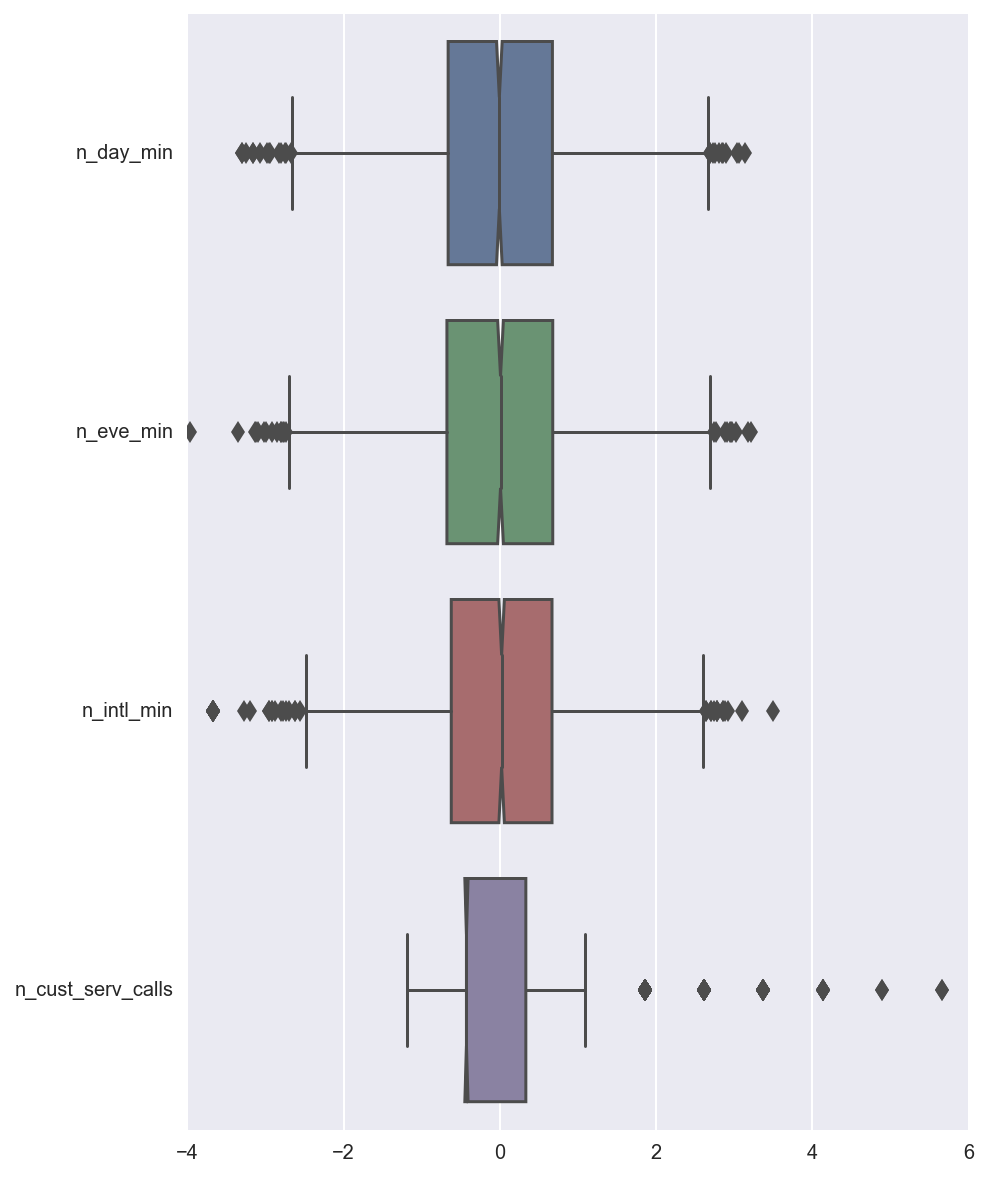

In [91]:
fig = plt.figure(figsize=(7,10))
ax = fig.gca()

sns.boxplot(data=df[['n_day_min','n_eve_min','n_intl_min','n_cust_serv_calls']], 
            orient='h',fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

The next thing we wanted to do was to subset the data into one set for clients that have churned and for one
set who customers who have not churned. We set up two masks and created 2 new data frames using these masks. 

In [92]:
#Create two subsets of data. One where customers have left (cust_go) and one where customers have stayed(cust_stay)
churn_left_mask = (df.churn == True)
churn_stay_mask = (df.churn == False)

cust_go = df[churn_left_mask]
cust_stay = df[churn_stay_mask]

The next thing we did was to construct box plots for each of the subsets to see how they compared. 

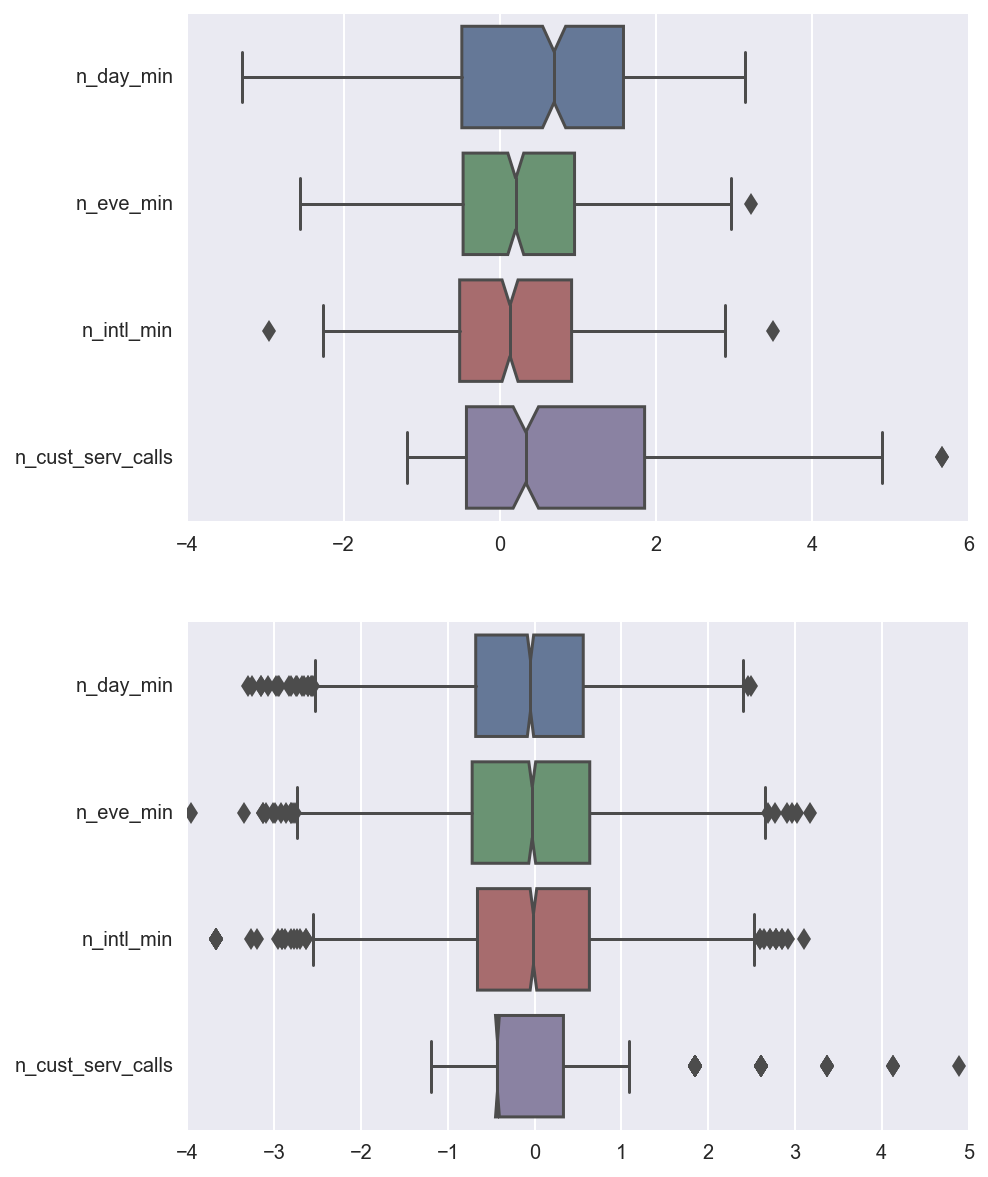

In [99]:
fig, axes_array = plt.subplots(2, 1, figsize=(7,10))

sns.boxplot(data=cust_go[['n_day_min','n_eve_min','n_intl_min','n_cust_serv_calls']], 
            orient='h',fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=axes_array[0])


sns.boxplot(data=cust_stay[['n_day_min','n_eve_min','n_intl_min','n_cust_serv_calls']], 
            orient='h',fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=axes_array[1])
